In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
df = pd.read_csv("Absenteeism_at_work_train.csv", thousands=',')
df.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90.0,172,30,2


In [33]:
#drop all Empty rows
df = df.dropna()

In [34]:
#format data types
df = df[df.Age.apply(lambda x: x.isnumeric())]
df = df.astype({'Age': 'int32'})

In [35]:
#convert data to categorical
df["Absence"] = pd.cut(df["Absenteeism time in hours"],bins=[-1,0,6,150],labels=[0,1,2])

In [36]:
df.dtypes

ID                                    int64
Reason for absence                    int64
Month of absence                      int64
Day of the week                       int64
Seasons                               int64
Transportation expense                int64
Distance from Residence to Work       int64
Service time                          int64
Age                                   int32
Work load Average/day                 int64
Hit target                          float64
Disciplinary failure                  int64
Education                             int64
Son                                   int64
Social drinker                        int64
Social smoker                         int64
Pet                                   int64
Weight                              float64
Height                                int64
Body mass index                       int64
Absenteeism time in hours             int64
Absence                            category
dtype: object

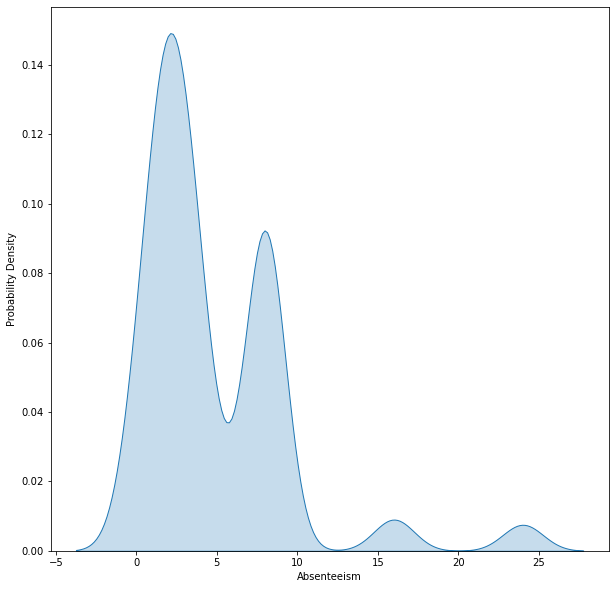

In [18]:
plt.figure(figsize=(10,10))
sns.kdeplot(df["Absenteeism time in hours"], shade=True, Label="Price")
plt.xlabel('Absenteeism')
plt.ylabel('Probability Density')
plt.show()

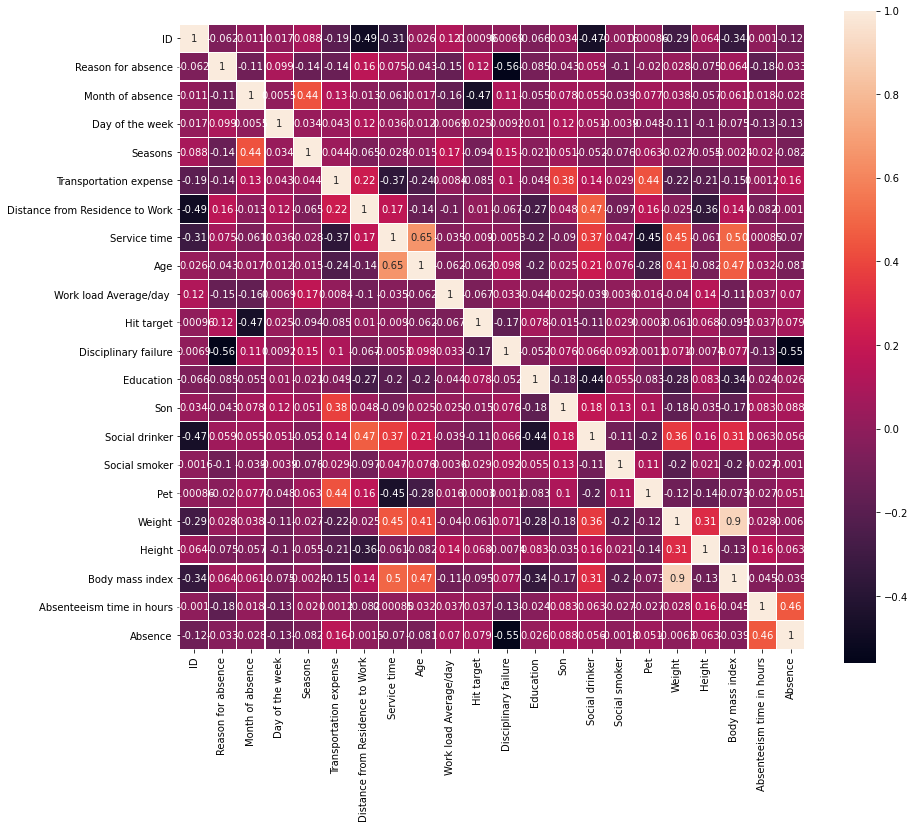

In [8]:
#plot correlation matrix
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()

## Classification

In [9]:
import warnings
import sklearn
from  sklearn import svm,neural_network,ensemble,linear_model,tree,gaussian_process,neighbors,naive_bayes
warnings.filterwarnings("ignore")
results = pd.DataFrame(columns=["Classifier","Accuracy"])
classifiers = {
    "Support Vector Classification":sklearn.svm.SVC(decision_function_shape='ovo'),
    "Multi-layer Perceptron classifier":sklearn.neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1),
    "AdaBoost classifier":sklearn.ensemble.AdaBoostClassifier(n_estimators=100),
    "Ridge Classifier":sklearn.linear_model.RidgeClassifier(),
    "Random Forest Classifier":sklearn.ensemble.RandomForestClassifier(max_depth=2, random_state=0),
    "Decision Tree Classifier":sklearn.tree.DecisionTreeClassifier(),
    "Gaussian Process Classifier":sklearn.gaussian_process.GaussianProcessClassifier(random_state=0),
    "K-nearest neighbors vote":sklearn.neighbors.KNeighborsClassifier(n_neighbors=13),
    "Gaussian Naive Bayes":sklearn.naive_bayes.GaussianNB(),
    "Passive Agressive Classifier":sklearn.linear_model.PassiveAggressiveClassifier()
    
}

X = df.drop(['ID', 'Absenteeism time in hours',"Absence"], axis=1)
y = df["Absence"]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

from sklearn.model_selection import cross_validate
row_index = 0
for key,value in classifiers.items():
    cv_results = cross_validate(value, X, y, cv=10)
    print(f"Classifier: {key}, Accuracy: {cv_results['test_score'].mean()}")
    results.loc[row_index, 'Classifier'] = key
    results.loc[row_index, 'Accuracy'] = cv_results['test_score'].mean()
    row_index+=1

Classifier: Support Vector Classification, Accuracy: 0.580054274084125
Classifier: Multi-layer Perceptron classifier, Accuracy: 0.5845997286295794
Classifier: AdaBoost classifier, Accuracy: 0.559023066485753
Classifier: Ridge Classifier, Accuracy: 0.7613071008593397
Classifier: Random Forest Classifier, Accuracy: 0.7777250113071009
Classifier: Decision Tree Classifier, Accuracy: 0.7353233830845771
Classifier: Gaussian Process Classifier, Accuracy: 0.4303030303030303
Classifier: K-nearest neighbors vote, Accuracy: 0.3755088195386703
Classifier: Gaussian Naive Bayes, Accuracy: 0.6704658525554048
Classifier: Passive Agressive Classifier, Accuracy: 0.4046359113523293


Text(0, 0.5, 'Algorithm')

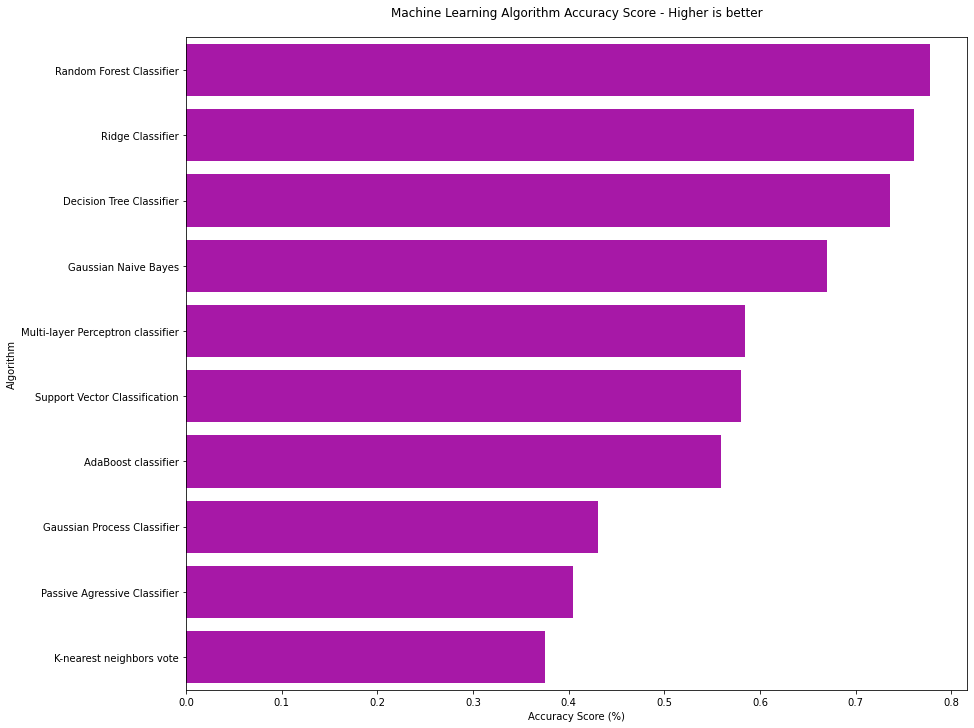

In [10]:
results.sort_values(by = ['Accuracy'], ascending = False, inplace = True)
plt.figure(figsize=(14,12))
sns.barplot(x='Accuracy', y = 'Classifier', data = results, color = 'm',)
plt.title('Machine Learning Algorithm Accuracy Score - Higher is better\n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## Regression

In [11]:
import warnings
from  sklearn import svm,neural_network,ensemble,linear_model,tree,gaussian_process,neighbors,naive_bayes
warnings.filterwarnings("ignore")
results = pd.DataFrame(columns=["Classifier","Accuracy"])
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()


regressors = {
    "Linear Regression":sklearn.linear_model.LinearRegression(),
    "Ridge Regression":sklearn.linear_model.Ridge(alpha=.01),
    "MLP":sklearn.neural_network.MLPRegressor(random_state=1, max_iter=500,hidden_layer_sizes=(50,20)),
    "lasso":sklearn.linear_model.Lasso(alpha=0.001),
    "Gaussian Process Regressor":sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel,random_state=0),
    "Support Vector Regressor":sklearn.svm.SVR(),
    "Decision Tree Regressor":sklearn.tree.DecisionTreeRegressor(max_depth=2),
    "Bayesian Regression":sklearn.linear_model.BayesianRidge(),
    "K_NN Regression":sklearn.neighbors.KNeighborsRegressor(13,weights='uniform'),
    "Elastic Net":sklearn.linear_model.ElasticNet()
    }

X = df.drop(['ID', 'Absenteeism time in hours',"Absence"], axis=1)
y = df['Absenteeism time in hours']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import cross_validate
row_index = 0
for key,value in regressors.items():
    cv_results = cross_validate(value, X, y, cv=10, scoring='neg_mean_squared_error')
    print(f"Classifier: {key}, Accuracy: {-cv_results['test_score'].mean()}")
    results.loc[row_index, 'Classifier'] = key
    results.loc[row_index, 'Accuracy'] = -cv_results['test_score'].mean()
    row_index+=1

Classifier: Linear Regression, Accuracy: 146.04066473147776
Classifier: Ridge Regression, Accuracy: 145.97508701925292
Classifier: MLP, Accuracy: 155.14963274582723
Classifier: lasso, Accuracy: 145.9155004165876
Classifier: Gaussian Process Regressor, Accuracy: 155.5034883486215
Classifier: Support Vector Regressor, Accuracy: 155.65242714979343
Classifier: Decision Tree Regressor, Accuracy: 162.8159560690645
Classifier: Bayesian Regression, Accuracy: 143.89101762787718
Classifier: K_NN Regression, Accuracy: 151.42229506046957
Classifier: Elastic Net, Accuracy: 161.1739708022081


Text(0, 0.5, 'Algorithm')

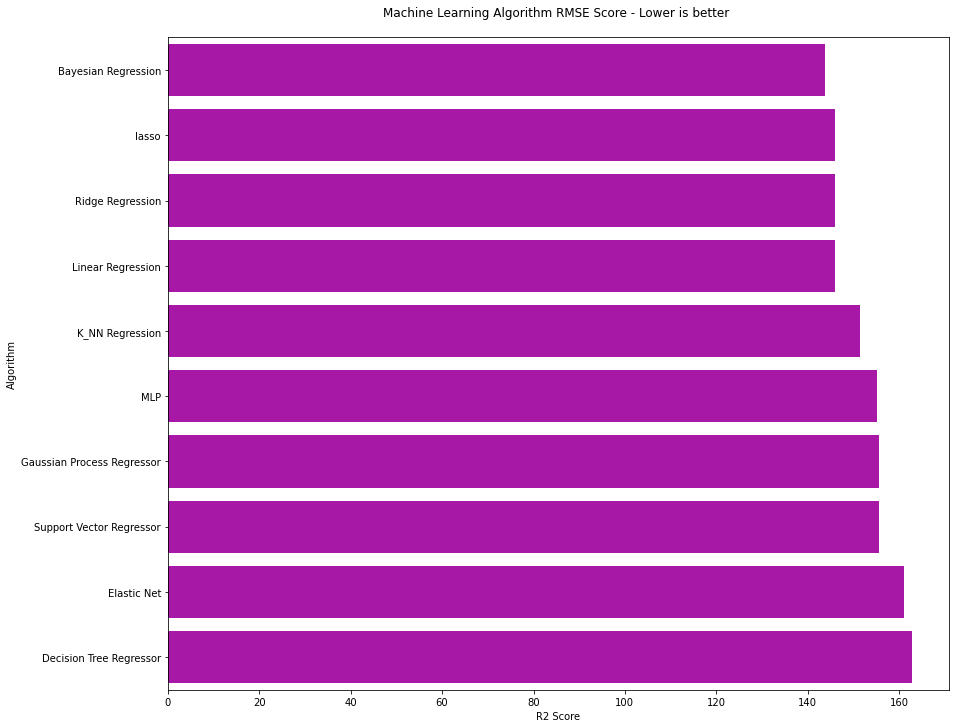

In [12]:
results.sort_values(by = ['Accuracy'], ascending = True, inplace = True)
plt.figure(figsize=(14,12))
sns.barplot(x='Accuracy', y = 'Classifier', data = results, color = 'm',)
plt.title('Machine Learning Algorithm RMSE Score - Lower is better \n')
plt.xlabel('R2 Score')
plt.ylabel('Algorithm')

## Technical Approach

Here we have a two fold problem to solve first we have to perform a classification analysis on the converted absenteeism hours variable and then we perform a regression analysis on the unconverted raw values. There are major changes between these approaches while the same approaches can be used the models have to be changes to fit with the task of regression or classification, second the scoring metrics are widely different between the approaches the classification approach uses the accuracy score whereas the regression approach uses the RMSE or the root mean square value.

The goal in this analysis was to compare the most popular regression and classification algorithms to find the best algorithm for this problem because there is rarely an algorithm that works the best for all cases hence we need to compare all the different algorithms to find out which works best for our case.

Another key aspect of this approach is cross validation. This is an important step to overcome overfitting in our dataset. Here the training set is split into 10 smaller sets so as to make sure that on every training run the model sees a different subset of the data. and the mean score of these runs is collected and the mean is calculated.

Finally the mean accuracy score after cross validation is collected for all the regression and classification algorithms is compared to find the best performing model for each use case.
In our case the best classification models were the Ridge Classifier and the Decision Tree Classifier and the best regression models were the Bayesian, Lasso and Ridge Regression linear models.
  

In [28]:
dft = pd.read_csv("Absenteeism_at_work_test.csv", thousands=',')
dft = dft.dropna()
dft = dft.astype({'Age': 'int32'})
dft["Absence"] = pd.cut(dft["Absenteeism time in hours"],bins=[-1,0,6,150],labels=[0,1,2])

In [14]:
#Testing Best Classification Model on Test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
Xt = dft.drop(['ID', 'Absenteeism time in hours',"Absence"], axis=1)
yt = dft["Absence"]
X = df.drop(['ID', 'Absenteeism time in hours',"Absence"], axis=1)
y = df["Absence"]
from sklearn import tree
from sklearn.metrics import accuracy_score
tree_model = sklearn.linear_model.RidgeClassifier().fit(X, y)
y_predict = tree_model.predict(Xt)
print(confusion_matrix(yt, y_predict))
print(accuracy_score(yt, y_predict)*100)

[[ 4  0  3]
 [ 0 29  9]
 [ 0 14 15]]
64.86486486486487


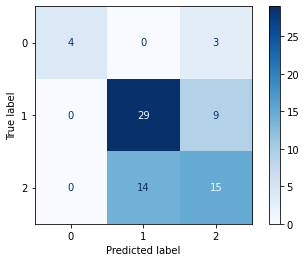

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sklearn.linear_model.RidgeClassifier().fit(X, y), Xt, yt,
                                 cmap=plt.cm.Blues)

In [37]:
#Testing Best Regression Model on Test set
from sklearn.metrics import mean_squared_error, r2_score
regr = sklearn.linear_model.BayesianRidge()

#Remove outliers
dft=dft[dft["Absenteeism time in hours"]<30]

Xt = dft.drop(['ID', 'Absenteeism time in hours',"Absence"], axis=1)
X = df.drop(['ID', 'Absenteeism time in hours',"Absence"], axis=1)
y=df["Absenteeism time in hours"]
yt=dft["Absenteeism time in hours"]
regr.fit(X, y)
y_pred = regr.predict(Xt)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(yt, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(yt, y_pred))

Coefficients: 
 [-2.13164710e-01  3.43336553e-02 -1.21648050e-01  3.99677320e-03
  2.80180715e-03 -1.65207326e-02  2.87601092e-02  5.48955051e-02
  9.99780271e-07  9.35481557e-02 -4.45706919e-02 -2.67059332e-02
  7.32415697e-02  2.73332853e-02 -1.25871194e-02 -9.66840131e-03
  1.09922107e-02  2.11679595e-01 -7.70001434e-02]
Mean squared error: 35.08
Coefficient of determination: -1.17


Text(0.5, 1.0, 'Visualizing Predictions')

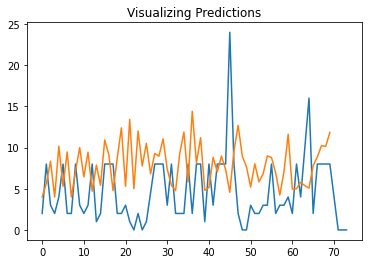

In [38]:
plt.plot(yt)
plt.plot(y_pred)
plt.title('Visualizing Predictions')